In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import time

In [2]:
t1 = time.time()

In [3]:
#path = "/Users/niharawarawita/Desktop/MSc Project/Data/EMG_data_collection/combined_stats_nihara.csv"
#data = pd.read_csv(path)
#data.head()

path = "/Users/niharawarawita/Desktop/MSc Project/Data/combined_datasets.csv"
data = pd.read_csv(path)
data.head(10)

,participant_id,clothes_id,property_id,property_name,interaction_id,rating,rating_level,rating_level_num,sub_window_num,subwindow_start_time,...,std_z_Hand1,std_AVx_Hand1,std_AVy_Hand1,std_AVz_Hand1,std_AAx_Hand1,std_AAy_Hand1,std_AAz_Hand1,std_AJx_Hand1,std_AJy_Hand1,std_AJz_Hand1
0,7,14,3,smoothness,1,3,medium,2,1,2021-08-05 13:21:31.481,...,0.001773,0.140168,0.419609,0.109731,8.409602,20.970763,7.985693,769.853603,1878.284384,898.072858
1,7,14,3,smoothness,1,3,medium,2,2,2021-08-05 13:21:32.495,...,0.007212,0.166403,0.417988,0.173217,7.359519,14.858287,9.153837,744.182656,1454.186126,769.701026
2,7,14,3,smoothness,1,3,medium,2,3,2021-08-05 13:21:33.513,...,0.012151,0.123687,0.282669,0.113030,4.806996,10.779876,6.534156,486.415887,1142.095742,625.153662
3,7,14,4,thickness,2,5,medium,2,1,2021-08-05 13:22:02.060,...,0.003958,0.198462,0.183171,0.155875,11.152448,9.963270,16.088213,1150.663729,1135.642103,2119.655762
4,7,14,4,thickness,2,5,medium,2,2,2021-08-05 13:22:03.061,...,0.002573,0.181719,0.217952,0.053026,5.253641,7.297097,3.331552,548.393076,819.998059,375.285448
5,7,14,4,thickness,2,5,medium,2,3,2021-08-05 13:22:04.089,...,0.004419,0.136329,0.136392,0.080490,5.948223,5.273546,4.484067,548.302677,461.158083,430.242493
6,7,14,5,warmth,3,4,medium,2,1,2021-08-05 13:22:31.916,...,0.003448,0.039194,0.114553,0.133050,2.240763,4.172808,10.907450,282.637410,364.125511,1378.104484
7,7,14,5,warmth,3,4,medium,2,2,2021-08-05 13:22:32.921,...,0.005111,0.019737,0.067714,0.148505,0.890300,2.983282,9.940538,74.094374,227.550948,905.421557
8,7,14,5,warmth,3,4,medium,2,3,2021-08-05 13:22:33.943,...,0.029029,0.082006,0.267581,0.192136,3.198438,7.364610,9.584111,272.472840,618.347885,1022.027358
9,7,14,6,flexibility,4,1,low,1,1,2021-08-05 13:23:00.627,...,0.004806,0.231302,0.168814,0.119388,9.319012,8.356834,6.251922,907.661263,745.336220,543.331560


In [4]:
print(data.property_name.unique())
print(data.property_id.unique())

['smoothness' 'thickness' 'warmth' 'flexibility' 'softness' 'enjoyment']
[3 4 5 6 7 8]


In [5]:
# Initialise the random state
num = 183 #random.randint(1, 500)
print(f"The generated random seed is {num}") #347

The generated random seed is 183


## Section A) Physical properties

### Observe the data

In [6]:
physical_data = data[data.property_name != 'enjoyment']
physical_data.head()

,participant_id,clothes_id,property_id,property_name,interaction_id,rating,rating_level,rating_level_num,sub_window_num,subwindow_start_time,...,std_z_Hand1,std_AVx_Hand1,std_AVy_Hand1,std_AVz_Hand1,std_AAx_Hand1,std_AAy_Hand1,std_AAz_Hand1,std_AJx_Hand1,std_AJy_Hand1,std_AJz_Hand1
0,7,14,3,smoothness,1,3,medium,2,1,2021-08-05 13:21:31.481,...,0.001773,0.140168,0.419609,0.109731,8.409602,20.970763,7.985693,769.853603,1878.284384,898.072858
1,7,14,3,smoothness,1,3,medium,2,2,2021-08-05 13:21:32.495,...,0.007212,0.166403,0.417988,0.173217,7.359519,14.858287,9.153837,744.182656,1454.186126,769.701026
2,7,14,3,smoothness,1,3,medium,2,3,2021-08-05 13:21:33.513,...,0.012151,0.123687,0.282669,0.113030,4.806996,10.779876,6.534156,486.415887,1142.095742,625.153662
3,7,14,4,thickness,2,5,medium,2,1,2021-08-05 13:22:02.060,...,0.003958,0.198462,0.183171,0.155875,11.152448,9.963270,16.088213,1150.663729,1135.642103,2119.655762
4,7,14,4,thickness,2,5,medium,2,2,2021-08-05 13:22:03.061,...,0.002573,0.181719,0.217952,0.053026,5.253641,7.297097,3.331552,548.393076,819.998059,375.285448


<AxesSubplot:>

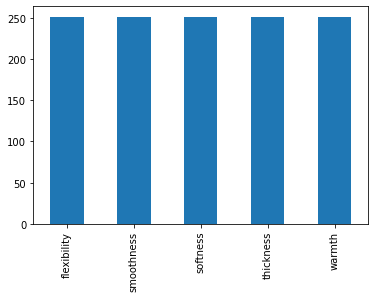

In [7]:
physical_data['property_name'].value_counts().sort_index().plot.bar()

Balanced data. Each property has approximately the same number of samples

<AxesSubplot:>

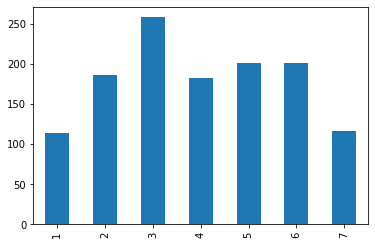

In [8]:
physical_data['rating'].value_counts().sort_index().plot.bar()

Modal answer was 6. Very few people said 1

<AxesSubplot:>

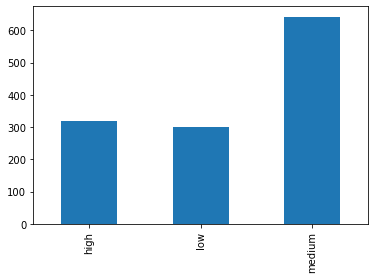

In [9]:
physical_data['rating_level'].value_counts().sort_index().plot.bar()

<AxesSubplot:>

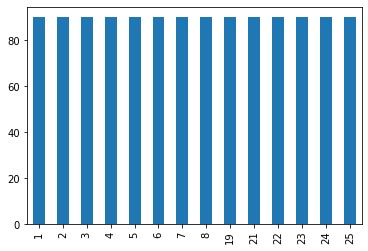

In [10]:
physical_data['participant_id'].value_counts().sort_index().plot.bar()

<AxesSubplot:>

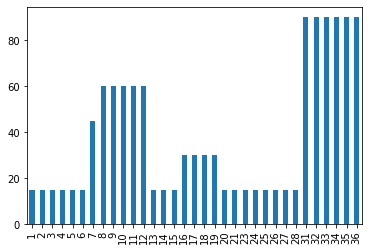

In [11]:
physical_data['clothes_id'].value_counts().sort_index().plot.bar()

Unbalanced data. More than double the number of observations for medium than low

### Task 1: Predicting the property based on the provided data (excluding enjoyment data)

#### Step 1: LOPOCV (Leave One Participant Out CV)

In [12]:
# Note: predicting_feature = 'property_id' or 'rating'

def rf_LOPOCV_properties(data, num_inner_folds=5, predicting_feature = 'property_id', random_state=num):
    if predicting_feature == 'property_id':
        print(f'Classification accuracy when predicting properties at random : {round(1/len(data.property_id.unique())*100,2)}% ')
    else:
        print(f'Classification accuracy when predicting ratings at random : {round(1/len(data.rating_level_num.unique())*100,2)}% ')
    print('__________________________________________')

    if predicting_feature == 'property_id':
        macro_f1_lst = []
    elif predicting_feature == 'rating_level_num':
        weighted_f1_lst = []    
    micro_f1_lst = []
    acc_lst = []
    total_conf_mat = 0

    for participant in sorted(data.participant_id.unique()): #range(19,26):    
        #if participant == 20:
            #pass
        #else:
        # Split the data into training and testing
        training_data = data[data.participant_id != participant]
        testing_data = data[data.participant_id == participant]

        # Data preparation
        starting_index = 11
        X_train = training_data.iloc[:,starting_index:].values        
        y_train = training_data[predicting_feature].values
        X_test = testing_data.iloc[:,starting_index:].values        
        y_test = testing_data[predicting_feature].values

        # Configure the cross-validation procedure
        cv_inner = KFold(n_splits=num_inner_folds, shuffle=True, random_state=num)

        # Define the model
        rf_model = RandomForestClassifier(random_state=num)

        # Create a dictionary with the hyperparameters to tune
        features_dict = dict()
        features_dict['n_estimators'] = [100, 500, 1000, 1500]

        # Define the Grid Search
        if predicting_feature == 'property_id':
            search = GridSearchCV(rf_model, features_dict, scoring='f1_macro', cv=cv_inner, refit=True) #accuracy
        elif predicting_feature == 'rating_level_num':
            search = GridSearchCV(rf_model, features_dict, scoring='f1_weighted', cv=cv_inner, refit=True) #accuracy
        #search = GridSearchCV(rf_model, features_dict, scoring='f1_macro', cv=cv_inner, refit=True) #accuracy

        # Execute the search
        result = search.fit(X_train, y_train)

        # Obtain the best performing model fit on the whole training set
        best_rf_model = result.best_estimator_

        # Using the model, obtain predictions for the test data
        predictions = best_rf_model.predict(X_test)

        # Evaluate the model
        if predicting_feature == 'property_id':
            conf_mat = confusion_matrix(y_test, predictions, labels=[3, 4, 5, 6, 7])
            macro_f1_score = f1_score(y_test, predictions, average='macro') 
            macro_f1_lst.append(macro_f1_score) 
        elif predicting_feature == 'rating_level_num':
            conf_mat = confusion_matrix(y_test, predictions, labels=[1,2,3])
            weighted_f1_score = f1_score(y_test, predictions, average='weighted') 
            weighted_f1_lst.append(weighted_f1_score)
            
        total_conf_mat += conf_mat
        micro_f1_score = f1_score(y_test, predictions, average='micro')  
        micro_f1_lst.append(micro_f1_score)
        acc = accuracy_score(y_test, predictions)
        acc_lst.append(acc)

        print(f'Leaving participant {participant} out {result.best_params_}:') 
        print("(1) Confusion matrix:\n", conf_mat)
        print(f"(2) Micro F1 score = {round(micro_f1_score,2)}")
        if predicting_feature == 'property_id':
            print(f"(3) Macro F1 score = {round(macro_f1_score,2)}")
        elif predicting_feature == 'rating_level_num':
            print(f"(3) Weighted F1 score = {round(weighted_f1_score,2)}")            
        print(f"(4) Percentage Classification accuracy = {round(acc*100,2)}%")

        print('__________________________________________')

    avg_micro_f1_score = sum(micro_f1_lst) / len(micro_f1_lst)
    if predicting_feature == 'property_id':
        avg_macro_f1_score = sum(macro_f1_lst) / len(macro_f1_lst)
    elif predicting_feature == 'rating_level_num':
        avg_weighted_f1_score = sum(weighted_f1_lst) / len(weighted_f1_lst)               
    avg_acc = sum(acc_lst) / len(acc_lst)   
    
    print(f'Using Leave One Participant Out CV (LOPOCV):') 
    print("(1) Confusion matrix:\n", total_conf_mat)
    print(f"(2) Average micro F1 score = {round(avg_micro_f1_score,2)}")
    if predicting_feature == 'property_id':
        print(f"(3) Average macro F1 score = {round(avg_macro_f1_score,2)}")
    elif predicting_feature == 'rating_level_num':
        print(f"(3) Average weighted F1 score = {round(avg_weighted_f1_score,2)}")      
    print(f"(4) Average Percentage Classification accuracy = {round(avg_acc*100,2)}%")
            

In [13]:
#rf_LOPOCV_properties(data=physical_data, num_inner_folds=3, predicting_feature = 'property_id', random_state=num) 


#### Step 2: LOCOCV (Leave One Cloth(Sock) Out CV)

 Note: predicting_feature = 'property_id' or 'rating'

def rf_LOCOCV_properties(data, num_inner_folds=5, predicting_feature = 'property_id', random_state=num):
    if predicting_feature == 'property_id':
        print(f'Classification accuracy when predicting properties at random : {round(1/len(data.property_id.unique())*100,2)}% ')
    else:
        print(f'Classification accuracy when predicting ratings at random : {round(1/len(data.rating_level_num.unique())*100,2)}% ')
    print('__________________________________________')
        
    if predicting_feature == 'property_id':
        macro_f1_lst = []
    elif predicting_feature == 'rating_level_num':
        weighted_f1_lst = []    
    micro_f1_lst = []
    acc_lst = []
    for cloth_id in sorted(data.clothes_id.unique()): #range(1,7):      
        # Split the data into training and testing
        training_data = data[data.clothes_id != cloth_id]
        testing_data = data[data.clothes_id == cloth_id]
        
        # Data preparation
        starting_index = 11
        X_train = training_data.iloc[:,starting_index:].values        
        y_train = training_data[predicting_feature].values
        X_test = testing_data.iloc[:,starting_index:].values        
        y_test = testing_data[predicting_feature].values
        print(y_test.shape)
        
        # Configure the cross-validation procedure
        cv_inner = KFold(n_splits=num_inner_folds, shuffle=True, random_state=num)
        
        # Define the model
        rf_model = RandomForestClassifier(random_state=num)
        
        # Create a dictionary with the hyperparameters to tune
        features_dict = dict()
        features_dict['n_estimators'] = [100, 500, 1000, 1500]
        
        # Define the Grid Search
        if predicting_feature == 'property_id':
            search = GridSearchCV(rf_model, features_dict, scoring='f1_macro', cv=cv_inner, refit=True) #accuracy
        elif predicting_feature == 'rating_level_num':
            search = GridSearchCV(rf_model, features_dict, scoring='f1_weighted', cv=cv_inner, refit=True) #accuracy
        
        # Execute the search
        result = search.fit(X_train, y_train)    
        
        # Obtain the best performing model fit on the whole training set
        best_rf_model = result.best_estimator_
        
        # Using the model, obtain predictions for the test data
        predictions = best_rf_model.predict(X_test)
        
        # Evaluate the model
        if predicting_feature == 'property_id':
            conf_mat = confusion_matrix(y_test, predictions, labels=[3, 4, 5, 6, 7])
            macro_f1_score = f1_score(y_test, predictions, average='macro') 
            macro_f1_lst.append(macro_f1_score) 
        elif predicting_feature == 'rating_level_num':
            conf_mat = confusion_matrix(y_test, predictions, labels=[1,2,3])
            weighted_f1_score = f1_score(y_test, predictions, average='weighted') 
            weighted_f1_lst.append(weighted_f1_score) 
            
        micro_f1_score = f1_score(y_test, predictions, average='micro')  
        micro_f1_lst.append(micro_f1_score)
        acc = accuracy_score(y_test, predictions)
        acc_lst.append(acc)
        
        print(f'Leaving cloth with clothes_id {cloth_id} out {result.best_params_}:') 
        print("(1) Confusion matrix:\n", conf_mat)
        print(f"(2) Micro F1 score = {round(micro_f1_score,2)}")
        if predicting_feature == 'property_id':
            print(f"(3) Macro F1 score = {round(macro_f1_score,2)}")
        elif predicting_feature == 'rating_level_num':
            print(f"(3) Weighted F1 score = {round(weighted_f1_score,2)}")            
        print(f"(4) Percentage Classification accuracy = {round(acc*100,2)}%")

        print('__________________________________________')    

    avg_micro_f1_score = sum(micro_f1_lst) / len(micro_f1_lst)
    if predicting_feature == 'property_id':
        avg_macro_f1_score = sum(macro_f1_lst) / len(macro_f1_lst)
    elif predicting_feature == 'rating_level_num':
        avg_weighted_f1_score = sum(weighted_f1_lst) / len(weighted_f1_lst)               
    avg_acc = sum(acc_lst) / len(acc_lst)   
    
    print(f'Using Leave One Cloth Out CV (LOCOCV):') 
    print(f"(1) Average micro F1 score = {round(avg_micro_f1_score,2)}")
    if predicting_feature == 'property_id':
        print(f"(2) Average macro F1 score = {round(avg_macro_f1_score,2)}")
    elif predicting_feature == 'rating_level_num':
        print(f"(2) Average weighted F1 score = {round(avg_weighted_f1_score,2)}")      
    print(f"(3) Average Percentage Classification accuracy = {round(avg_acc*100,2)}%")


rf_LOCOCV_properties(data=physical_data, num_inner_folds=3, predicting_feature = 'property_id', random_state=num) 


### Task 2: Predicting the rating of the property based on the data

#### Step 1: LOPOCV (Leave One Participant Out CV)

In [14]:
def rf_LOPOCV_rating(data, num_inner_folds=5, predicting_feature = 'rating_level_num', random_state=num):
    lst = ['smoothness', 'thickness', 'warmth', 'flexibility', 'softness']#, 'enjoyment']
    #print(f'Classification accuracy when predicting properties at random: {round((1/7)*100,2)}% ')
    for prop in lst:
        # Create dataset
        property_data = data[data.property_name == prop]
        
        print(f"For {prop}:")
        rf_LOPOCV_properties(data=property_data, num_inner_folds=5, predicting_feature = 'rating_level_num', random_state=num)
        print('____________________________________________________________________________________')
        

In [15]:
rf_LOPOCV_rating(data=physical_data, num_inner_folds=3, predicting_feature = 'rating_level_num', random_state=num)


For smoothness:
Classification accuracy when predicting ratings at random : 33.33% 
__________________________________________
Leaving participant 1 out {'n_estimators': 1000}:
(1) Confusion matrix:
 [[0 0 0]
 [1 7 4]
 [0 3 3]]
(2) Micro F1 score = 0.56
(3) Weighted F1 score = 0.58
(4) Percentage Classification accuracy = 55.56%
__________________________________________
Leaving participant 2 out {'n_estimators': 1500}:
(1) Confusion matrix:
 [[0 9 0]
 [0 9 0]
 [0 0 0]]
(2) Micro F1 score = 0.5
(3) Weighted F1 score = 0.33
(4) Percentage Classification accuracy = 50.0%
__________________________________________
Leaving participant 3 out {'n_estimators': 100}:
(1) Confusion matrix:
 [[0 3 0]
 [0 9 0]
 [0 6 0]]
(2) Micro F1 score = 0.5
(3) Weighted F1 score = 0.33
(4) Percentage Classification accuracy = 50.0%
__________________________________________
Leaving participant 4 out {'n_estimators': 1500}:
(1) Confusion matrix:
 [[0 9 0]
 [0 6 0]
 [0 3 0]]
(2) Micro F1 score = 0.33
(3) Weight

#### Step 2: LOCOCV (Leave One Cloth(Sock) Out CV)

def rf_LOCOCV_rating(data, num_inner_folds=5, predicting_feature = 'rating_level_num', random_state=num):
    lst = ['smoothness', 'thickness', 'warmth', 'flexibility', 'softness']
    for prop in lst:
        # Create dataset
        property_data = data[data.property_name == prop]
        
        print(f"For {prop}:")
        rf_LOCOCV_properties(data=property_data, num_inner_folds=5, predicting_feature = 'rating_level_num', random_state=num)
        print('____________________________________________________________________________________')
        

rf_LOCOCV_rating(data=physical_data, num_inner_folds=3, predicting_feature = 'rating_level_num', random_state=num)
    

In [16]:
CFGHLJ

NameError: name 'CFGHLJ' is not defined

In [ ]:
t2 = time.time()
print(t2 -t1)

In [ ]:
fchjgvkhlj

## Section B) Affective properties - Enjoyment

### Task 1: Predicting the property based on the provided data (including enjoyment data)

#### Step 1: Basic implementation, without CV

In [ ]:
rf_properties(data, random_state=num)    

#### Step 2: LOCOCV (Leave One Cloth(Sock) Out CV)

### Task 2: Predicting the rating of the property based on the data

In [ ]:
enjoyment_data = data[data.property_name == 'enjoyment']

In [ ]:
def rf_rating_enjoyment(data, random_state = num):
    print(f'Classification accuracy when predicting properties at random: {round((1/7)*100,2)}% ')

    # Data preparation
    y_property = data['rating'].values
    X_property = data.iloc[:,9:].values

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_property, y_property, test_size = 0.3, shuffle=True, random_state = num) 

    # Instantiate model with 1000 decision trees
    rf_model = RandomForestClassifier(n_estimators = 1000, random_state = num) 

    # Train the model on the training data
    rf_model.fit(X_train, y_train)

    # Using the model, obtain predictions for the test data
    predictions = rf_model.predict(X_test)

    # Calculate the number of correct predictions
    acc = accuracy_score(y_test, predictions)   

    # Print out the percentage classification accuracy for the test set
    print(f'Classification accuracy for the test set when predicting the rating for enjoyment: {round(acc*100,2)}%')

rf_rating_enjoyment(enjoyment_data)
     

In [ ]:
t2 = time.time()
t2 - t1

In [ ]:
gjvhkbjln

def rf_properties(data, random_state=num): #drop=None, 
    print(f'Classification accuracy when predicting properties at random : {round(1/len(data.property_id.unique())*100,2)}% ')

    # Data preparation
    y = data['property_id'].values
    starting_index = 10
    X = data.iloc[:,starting_index:].values

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle=True, random_state = num) 

    # Instantiate model with 1000 decision trees
    rf_model = RandomForestClassifier(n_estimators = 1000, random_state = num) 

    # Train the model on the training data
    rf_model.fit(X_train, y_train)

    # Using the model, obtain predictions for the test data
    predictions = rf_model.predict(X_test)

    # Evaluate the model
    conf_mat = confusion_matrix(y_test, predictions, labels=[12, 13, 14, 15, 16])
    f1_score_val = f1_score(y_test, predictions, average=None)
    avg_f1_score = sum(f1_score_val) / len(f1_score_val)
    acc = accuracy_score(y_test, predictions)

    print('Metrics that evaluate the classification accuracy of the random forest:') 
    print("(1) Confusion matrix:\n", conf_mat)
    print(f"(2) F1 score = {round(avg_f1_score,2)}")
    print(f"(3) Percentage Classification accuracy = {round(acc*100,2)}%")

rf_properties(data=physical_data, random_state=num)  

def rf_rating(data, random_state = num):
    lst = ['smoothness', 'thickness', 'warmth', 'flexibility', 'softness']#, 'enjoyment']
    print(f'Classification accuracy when predicting properties at random: {round((1/7)*100,2)}% ')
    print('__________________________________________')
    
    for prop in lst:
        # Create dataset
        property_data = data[data.property_name == prop]
        
        # Data preparation
        starting_index = 10
        X_property = property_data.iloc[:,starting_index:].values
        y_property = property_data['rating'].values

        
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X_property, y_property, test_size = 0.3, shuffle=True, random_state = num) 

        # Instantiate model with 1000 decision trees
        rf_model = RandomForestClassifier(n_estimators = 1000, random_state = num) 

        # Train the model on the training data
        rf_model.fit(X_train, y_train)
        
        # Using the model, obtain predictions for the test data
        predictions = rf_model.predict(X_test)

        # Evaluate the model
        conf_mat = confusion_matrix(y_test, predictions, labels=[1, 2, 3, 4, 5, 6, 7])
        f1_score_val = f1_score(y_test, predictions, average=None)
        avg_f1_score = sum(f1_score_val) / len(f1_score_val)
        acc = accuracy_score(y_test, predictions)

        # Print out the percentage classification accuracy for the test set
       # print(f'Classification accuracy for the test set when predicting the rating for {prop}: {round(acc*100,2)}%')
        print(f'Metrics that evaluate the classification accuracy of the random forest for property {prop}:') 
        print("(1) Confusion matrix:\n", conf_mat)
        print(f"(2) F1 score = {round(avg_f1_score,2)}")
        print(f"(3) Percentage Classification accuracy = {round(acc*100,2)}%")


        print('__________________________________________')


rf_rating(data=physical_data)


#### First, consider only the physical properties

In [ ]:
print(data.shape)
data = data[data.property_name != 'enjoyment']
print(data.shape)

In [ ]:
# manual nested cross-validation for random forest on a classification dataset
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# create dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=1, n_informative=10, n_redundant=10)
# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)
# enumerate splits
num_inner_folds = 5
outer_results = list()
for train_ix, test_ix in cv_outer.split(X):
    # split data
    X_train, X_test = X[train_ix, :], X[test_ix, :]
    y_train, y_test = y[train_ix], y[test_ix]
    # configure the cross-validation procedure
    cv_inner = KFold(n_splits=num_inner_folds, shuffle=True, random_state=num)
    # define the model
    model = RandomForestClassifier(random_state=num)
    # define search space
    space = dict()
    space['n_estimators'] = [10, 100, 500, 1000]
    # define search
    search = GridSearchCV(model, space, scoring='accuracy', cv=cv_inner, refit=True) #accuracy
    # execute search
    result = search.fit(X_train, y_train)
    # get the best performing model fit on the whole training set
    best_model = result.best_estimator_
    # evaluate model on the hold out dataset
    yhat = best_model.predict(X_test)
    # evaluate the model
    acc = accuracy_score(y_test, yhat)
    # store the result
    outer_results.append(acc)
    # report progress
print('>acc=%.3f, est=%.3f, cfg=%s' % (acc, result.best_score_, result.best_params_))
# summarize the estimated performance of the model
print('Accuracy: %.3f (%.3f)' % (mean(outer_results), std(outer_results)))